In [40]:
# 1. Finding the Eigenvalues and Eigenvectors of a Matrix
## Let A be the matrix given below. 
### A = [[4,0,1],[-1,-6,-2],[5,0,0]]

# a) is the vector [[1],[2],[3]] an eigenvector of A? Verify your answer with a calculation in Python. 


# b) Is the vector [[0],[1],[0]] an eigenvector of A? Again, verify your answer with a calculation in python. 

# c) Use python to find all the eigenvalues and eigenvectors of A. 

import numpy as np

A = np.matrix('4 0 1; -1 -6 -2; 5 0 0')

# Eiganvectors determined by testing if mulitple contains common factor v
va = np.array([1, 2, 3]).reshape(3,1)
vb = np.array([0, 2 , 0]).reshape(3,1)

# Are the eiganvectors via testing elements equal?
a = (A@va)==np.nan_to_num((A@va/va)) # False
b = (A@vb)==np.nan_to_num((A@vb/vb)) # True

# Boolean of the solution
print('Is Vector a an eigenvector of A? : ', np.all(a==True))
print('Is Vector b an eigenvector of A? : ', np.all(b==True))

# Define eigenvalues and eigenvectors in iterable
eigs = np.linalg.eig(A)

# print solution
print(f' Eigenvalues of A: {eigs[0]}\n'
      f' Eigenvectors of A: \n{eigs[1]}')

Is Vector a an eigenvector of A? :  False
Is Vector b an eigenvector of A? :  False
 Eigenvalues of A: [-6.  5. -1.]
 Eigenvectors of A: 
[[ 0.          0.69431384 -0.18493168]
 [ 1.         -0.18935832 -0.33287702]
 [ 0.          0.69431384  0.9246584 ]]


C:\Users\ashem\AppData\Local\Temp\ipykernel_22520\2311187840.py:22: RuntimeWarning: invalid value encountered in divide
  b = (A@vb)==np.nan_to_num((A@vb/vb)) # True


In [55]:

# 2. Principal Component Analysis
## For this exercise, you will be working with the data set video game data.csv. This data has four columns: name of the game, critic score, user score, and total sales. Note: This data set is a modified version of the data set from https://www.kaggle.com/ashaheedq/video-games-sales-2019.


In [54]:
# (a) Make a scatterplot of the user scores versus critics scores. 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

data = pd.read_csv('video_game_data.csv')

data.head()

,name,critic_score,user_score,total_shipped
0,Mario Kart Wii,8.2,9.1,37.14
1,Wii Sports Resort,8.0,8.8,33.09
2,New Super Mario Bros.,9.1,8.1,30.80
3,New Super Mario Bros. Wii,8.6,9.2,30.22
4,Mario Kart DS,9.1,9.4,23.60


In [42]:
data_ = data.loc[:,['critic_score', 'user_score']]
data_.head()

,critic_score,user_score
0,8.2,9.1
1,8.0,8.8
2,9.1,8.1
3,8.6,9.2
4,9.1,9.4


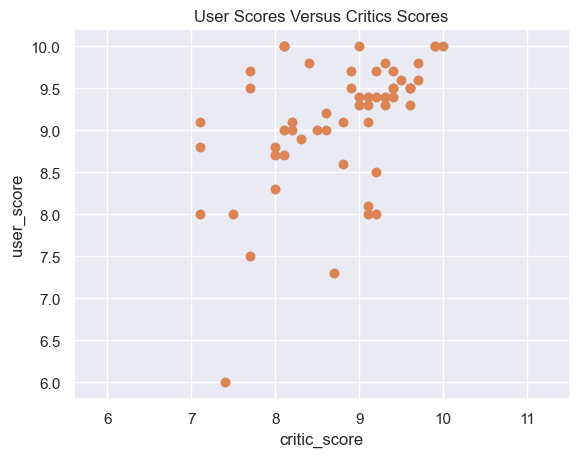

In [49]:
data_scores = pd.read_csv("video_game_data.csv")
plt.scatter(data_scores['critic_score'],
data_scores['user_score'],
alpha=0.3)
plt.xlabel('critic_score')
plt.ylabel('user_score')
plt.title('User Scores Versus Critics Scores')
plt.scatter(x, y)
plt.axis('equal')
plt.show()

In [50]:
# (b) On your own scatterplot from part (a), sketch the approximate direction of the first and second principal components.

## create data matrix X with the two variables: user scores and critic scores:

X = np.array([data_['critic_score'], data_['user_score']]).T
X.shape


# Compute the covariance matrisx of the dataset:

C= np.cov(X, rowvar=False)
C

## The covariance between the two variables is around 0.28

array([[0.59682331, 0.27559211],
       [0.27559211, 0.60490602]])

In [51]:
## Calculate the eigenvectors and eigenvalues of this covariance matrix:

eigvals, eigvecs = np.linalg.eig(C)
eigvals, eigvecs


(array([0.32524293, 0.8764864 ]),
 array([[-0.71227196, -0.7019036 ],
        [ 0.7019036 , -0.71227196]]))

In [52]:
## Store the eigenvectors as two vectors u and v.

u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)


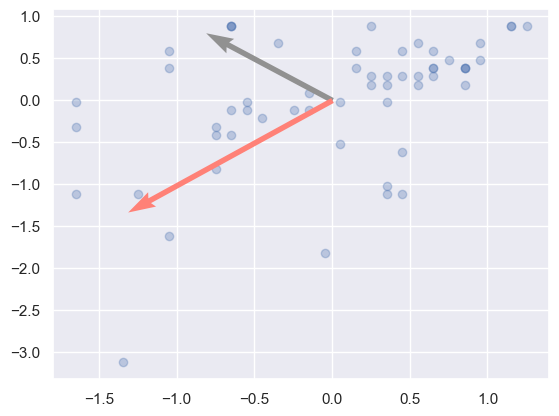

In [53]:
## Plot the eigenvectors with the data using centered data using vector length of three standard deviations:

# eigenvector u is in gray while v is in red, scaled according to the explained variance.

X_centered = X - X.mean(axis=0)
plt.quiver(0, 0,
2 * np.sqrt(eigvals[0]) * u[0], 2 * np.sqrt(eigvals[0]) * u[1],
color="#919191", angles='xy', scale_units='xy', scale=1,
zorder=2, width=0.011)
plt.quiver(0, 0,
2 * np.sqrt(eigvals[1]) * v[0], 2 * np.sqrt(eigvals[1]) * v[1],
color="#FF8177", angles='xy', scale_units='xy', scale=1,
zorder=2, width=0.011)
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3)